# Detecção de idiomas!

O dataset escolhido para este trabalho contém frases em vários idiomas.

Disponível em: https://tatoeba.org/pt-br/downloads

O objetivo é classificar qual o idioma da respectiva frase!

## Características do Dataset

- ID: Identificador da frase

- lang: Idioma da frase

- text: A frase em si.

- created_at: Data de criação da frase (de acordo com o site de download, o dataset é atualizado todos os sábados às 6:30 UTC )

No momento, o mesmo possui 556930 registros.

## Interpretando o dataset

In [1]:
import pandas as pd
dataframe = pd.read_csv("datasets/sentences_CC0.csv", sep="\t", header=None, names=["id", "lang", "text", "created_at"])

In [2]:
dataframe.head()

,id,lang,text,created_at
0,330998,eng,Children who spend more time outdoors have a l...,2019-01-12 19:39:42
1,331000,eng,The idea that reading makes you short-sighted ...,2019-01-12 19:39:42
2,331259,eng,Most people think computers will never be able...,2019-01-12 19:39:42
3,331708,fra,Je rajoute une phrase d'exemple.,2019-01-12 19:39:42
4,331955,fra,J'espère que je ne serai plus malade la semain...,2019-01-12 19:39:42


In [3]:
print(dataframe.shape)

(556930, 4)


### Transformação, tratamento e limpeza dos dados

In [4]:
# As respectivas colunas não servem para nada nesse problema
dataframe.drop(columns=["id", "created_at"], inplace=True)

In [5]:
dataframe.head()

,lang,text
0,eng,Children who spend more time outdoors have a l...
1,eng,The idea that reading makes you short-sighted ...
2,eng,Most people think computers will never be able...
3,fra,Je rajoute une phrase d'exemple.
4,fra,J'espère que je ne serai plus malade la semain...


### Vamos ver agora a proporção de cada idioma

In [6]:
print(dataframe["lang"].value_counts(normalize=True) * 100)

lang
kab    67.017938
ber    16.537626
eng     7.445999
rus     3.948611
fra     2.538200
         ...    
zgh     0.000180
cmn     0.000180
hoc     0.000180
non     0.000180
ile     0.000180
Name: proportion, Length: 62, dtype: float64


#### Apenas filtrando aqueles com mais de X%

In [7]:
# Frequência percentual de cada idioma
lang_freq = dataframe["lang"].value_counts(normalize=True) * 100

# Filtra apenas os idiomas com mais de X%
langs_over_2 = lang_freq[lang_freq > 0.25]

print(langs_over_2)


lang
kab    67.017938
ber    16.537626
eng     7.445999
rus     3.948611
fra     2.538200
ben     1.284003
bel     0.346363
fin     0.277055
Name: proportion, dtype: float64


## Kabyle e Berber estão desproporcionando o dataset
Kabyle: Idioma falado principalmente na Argélia.

Berber: Idioma falado no norte da África (Marrocos, Argélia, Tunísia, Líbia)


### Decisão
1 - Escolher apenas os principais idiomas do dataset (kab, ber, eng, rus, fra, ben).

2 - Ao invés de apagar os dados, vou simplesmente rebalancear-los!

Vamos balancear os dados a partir dos números do idioma francês, ou seja, cerca de 14 mil dados para cada idioma, além disso, vamos incluir também o idioma Bengali inteiro (idioma falado em Bangladesh e Índia).

#### Ou seja, Undersampling!


In [8]:
n_amostras = 14000
amostras = []
idiomas = ["kab", "ber", "eng", "rus", "fra"]

##Decidir pegar também o idioma "ben" com 7100 registros
amostras_idioma = dataframe[dataframe["lang"] == "ben"]
amostras.append(amostras_idioma.sample(n=7100, random_state=42))

for lang in idiomas:
  amostras_idioma = dataframe[dataframe["lang"] == lang]
  amostras.append(amostras_idioma.sample(n=n_amostras, random_state=42))

dataframe = pd.concat(amostras)
dataframe = dataframe.sample(frac=1, random_state=42).reset_index(drop=True)



### Ficamos então com a seguinte proporção!

In [9]:
print(f"{dataframe.shape}\n--")
print(f"{dataframe['lang'].value_counts()}\n--")
lang_freq = dataframe["lang"].value_counts(normalize=True) * 100

print(lang_freq)

(77100, 2)
--
lang
kab    14000
ber    14000
eng    14000
rus    14000
fra    14000
ben     7100
Name: count, dtype: int64
--
lang
kab    18.158236
ber    18.158236
eng    18.158236
rus    18.158236
fra    18.158236
ben     9.208820
Name: proportion, dtype: float64


In [10]:
dataframe.head(20)

,lang,text
0,kab,Yettawi yid-s tiqwijt d ṭṭbel.
1,ber,"Taɛekkemt n wurfan nettbbaba, ẓẓayet."
2,ben,চীন অত্যন্ত সাফল্যের সঙ্গে কোভিড প্রতিরোধ ও নি...
3,ber,Ifassen-nwent d ilmawen.
4,eng,She knows the city better than anyone.
5,rus,У тебя совести нет.
6,rus,Том – хороший игрок в шахматы.
7,fra,L'Algérie a peur du Maroc qui s'améliore de jo...
8,kab,Ur iɣawel ara ɣer Semɛun.
9,ben,কোন স্থানে নির্দিষ্ট আয়তনের বায়ুতে উপস্থিত জ...


## Tamanho das frases

Agora com o dataset balanceado, vamos ver o tamanho mínimo, máximo e médio de cada frase.

## LEMBRANDO QUE

Como foi pego amostras aleatórias, os resultados a seguir podem variar um pouco a cada iteração do notebook.

#### Quantidade de caracteres

In [11]:
comprimentos = dataframe["text"].str.len() 
print("Mínimo:", comprimentos.min())
print("Médio:", comprimentos.mean())
print("Máximo:", comprimentos.max())


Mínimo: 3
Médio: 53.045525291828795
Máximo: 1019


### Quantidade de palavras

In [12]:
comprimentos = dataframe["text"].str.split().str.len()
print("Mínimo:", comprimentos.min())
print("Médio:", comprimentos.mean())
print("Máximo:", comprimentos.max())


Mínimo: 1
Médio: 8.637081712062256
Máximo: 197


### Pré-Processamento

Dado que os algarismos dos idiomas podem variar, vamos apenas remover os números e converter tudo para minúsculo.


In [7]:
import re
def preprocessing(text):
  new_text = re.sub(r'[0-9.,?!]', ' ', text)
  new_text = new_text.lower()

  # Convertendo as palavras para uma lista
  return new_text.split()

In [14]:
dataframe.head()

,lang,text
0,kab,Yettawi yid-s tiqwijt d ṭṭbel.
1,ber,"Taɛekkemt n wurfan nettbbaba, ẓẓayet."
2,ben,চীন অত্যন্ত সাফল্যের সঙ্গে কোভিড প্রতিরোধ ও নি...
3,ber,Ifassen-nwent d ilmawen.
4,eng,She knows the city better than anyone.


In [15]:
# Agora cada frase tem uma lista de palavras
dataframe["words"] = dataframe["text"].apply(preprocessing)

In [16]:
dataframe.head()

,lang,text,words
0,kab,Yettawi yid-s tiqwijt d ṭṭbel.,"[yettawi, yid-s, tiqwijt, d, ṭṭbel]"
1,ber,"Taɛekkemt n wurfan nettbbaba, ẓẓayet.","[taɛekkemt, n, wurfan, nettbbaba, ẓẓayet]"
2,ben,চীন অত্যন্ত সাফল্যের সঙ্গে কোভিড প্রতিরোধ ও নি...,"[চীন, অত্যন্ত, সাফল্যের, সঙ্গে, কোভিড, প্রতিরো..."
3,ber,Ifassen-nwent d ilmawen.,"[ifassen-nwent, d, ilmawen]"
4,eng,She knows the city better than anyone.,"[she, knows, the, city, better, than, anyone]"


### OU SEJA
Não será aplicado a remoção de stop words, como "le/la" no francês, ou "the", "and" e "is" no inglês.

E nem a lematização: "correr", "correu", "correndo" -> "correr".

Pois o objetivo é classíficar os idiomas!

### Criação da bag of words!

Vamos utilizar o código visto no lab 01.

#### Primeiro, criamos o dicionário!

In [17]:
# Primeiro, criamos o dicionário
def constroi_dicionario(df):
  dict = {}
  index = 0
  for _, row in df.iterrows():
    for word in row.words:
      if word not in dict:
        dict[word] = index
        index += 1 

  return dict
    

In [18]:
word_dict = constroi_dicionario(dataframe)

In [19]:
print("Tamanho do dicionário:", len(word_dict))

# print("Primeiros 10 itens:", list(word_dict.items())[:20])
for i, (word, index) in enumerate(word_dict.items()):
  print(f"{index}: {word}")
  if i >= 20: 
      break

Tamanho do dicionário: 107510
0: yettawi
1: yid-s
2: tiqwijt
3: d
4: ṭṭbel
5: taɛekkemt
6: n
7: wurfan
8: nettbbaba
9: ẓẓayet
10: চীন
11: অত্যন্ত
12: সাফল্যের
13: সঙ্গে
14: কোভিড
15: প্রতিরোধ
16: ও
17: নিয়ন্ত্রণে
18: সক্ষম
19: হয়েছে।
20: ifassen-nwent


### Construção da Representação vetorial

In [20]:
import numpy as np

## Erro tentando alocar 61.8GB
def cria_matriz_bow(df, word_dict):
  counts = np.zeros((df.shape[0], len(word_dict)))

  for i, (_, row) in enumerate(df.iterrows()):
    for word in row.words:
      if word in word_dict:
        j = word_dict[word]
        counts[i,j] += 1

  return counts

# Solução: Matriz esparsa!
# Lembrei que fiz um trabalho sobre isso em C, lá em 2018.
# https://github.com/GodKelvin/ED_Matriz_Esparsa
# Resumo de como funciona
"""
# ISSO
dense = np.array([
  [0, 0, 1],
  [2, 0, 0],
  [0, 3, 0]
])

# VIRA ISSO:
  (0, 2)    1
  (1, 0)    2
  (2, 1)    3
"""

# Obviamente não implementei na mão, então usei a biblioteca a seguir
from scipy.sparse import lil_matrix

def cria_matriz_bow_esparsa(df, word_dict):
    counts = lil_matrix((df.shape[0], len(word_dict)), dtype=np.int32)  # tipo menor

    for i, (_, row) in enumerate(df.iterrows()):
      for word in row.words:
        if word in word_dict:
          j = word_dict[word]
          counts[i, j] += 1

    return counts


In [21]:
bow_mat = cria_matriz_bow_esparsa(dataframe, word_dict)
print(bow_mat.shape)
bow_mat

(77100, 107510)


<List of Lists sparse matrix of dtype 'int32'
	with 629613 stored elements and shape (77100, 107510)>

## Hora de criar o modelo!

### Divisão dos dados em conjunto de treino e teste

In [22]:
dataframe

,lang,text,words
0,kab,Yettawi yid-s tiqwijt d ṭṭbel.,"[yettawi, yid-s, tiqwijt, d, ṭṭbel]"
1,ber,"Taɛekkemt n wurfan nettbbaba, ẓẓayet.","[taɛekkemt, n, wurfan, nettbbaba, ẓẓayet]"
2,ben,চীন অত্যন্ত সাফল্যের সঙ্গে কোভিড প্রতিরোধ ও নি...,"[চীন, অত্যন্ত, সাফল্যের, সঙ্গে, কোভিড, প্রতিরো..."
3,ber,Ifassen-nwent d ilmawen.,"[ifassen-nwent, d, ilmawen]"
4,eng,She knows the city better than anyone.,"[she, knows, the, city, better, than, anyone]"
...,...,...,...
77095,ben,গত শনিবার ইসরায়েলে প্রথমবারের মতো সরাসরি হামল...,"[গত, শনিবার, ইসরায়েলে, প্রথমবারের, মতো, সরাসর..."
77096,rus,Я не буду в этом участвовать!,"[я, не, буду, в, этом, участвовать]"
77097,fra,Comment la théorie de la décroissance influenc...,"[comment, la, théorie, de, la, décroissance, i..."
77098,ben,রচনা হিসেবে এগুলো আলাদা স্বাতন্ত্র্যের দাবিদার।,"[রচনা, হিসেবে, এগুলো, আলাদা, স্বাতন্ত্র্যের, দ..."


In [23]:
from sklearn.preprocessing import LabelEncoder

# Vamos transformar cada idioma em um inteiro
y = LabelEncoder().fit_transform(dataframe['lang'])
y
print(f"{y.size} frases categorizadas")
print(f"{np.unique(y).size} idiomas" )
print(np.unique(y))

77100 frases categorizadas
6 idiomas
[0 1 2 3 4 5]


In [24]:

# tamanho do conjunto de treino
n = int(len(dataframe) * 0.7)

# seleciona as amostras de treino
x_bow_train = bow_mat[:n]
y_train = y[:n]

# seleciona as amostras de teste
x_bow_test = bow_mat[n:]
y_test = y[n:]

print("Shape x_bow_train:", x_bow_train.shape)
print("Shape x_bow_test:", x_bow_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape x_bow_train: (53970, 107510)
Shape x_bow_test: (23130, 107510)
Shape y_train: (53970,)
Shape y_test: (23130,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
from tqdm.auto import tqdm
names = [
  "KNN",
  "Linear Classifier",
  "Random Forest",
  "Neural Net",
]

classifiers = [
  KNeighborsClassifier(5, metric='cosine'),
  LogisticRegression(solver='saga', max_iter=500),
  RandomForestClassifier(),
  MLPClassifier(hidden_layer_sizes=(128, 128)),
]

result = []

for idx in tqdm(range(len(names))):
  name = names[idx]
  clf = classifiers[idx]

  # Treinamento do classificador
  clf.fit(x_bow_train, y_train)

  # Predições do classificador no conjunto de treino (para avaliar underfitting)
  y_train_pred = clf.predict(x_bow_train)

  # calcula métricas de treino
  train_prc, train_rcl, train_f1, _ = precision_recall_fscore_support(y_train, y_train_pred, average='macro', zero_division=0.0)
  train_acc = accuracy_score(y_train, y_train_pred)

  # Predições do classificador no conjunto de teste (para avaliar overfitting)
  y_test_pred = clf.predict(x_bow_test)

  # calcula métricas de teste
  test_prc, test_rcl, test_f1, _ = precision_recall_fscore_support(y_test, y_test_pred, average='macro', zero_division=0.0)
  test_acc = accuracy_score(y_test, y_test_pred)

  result.append({
    "classifier": name,
    "train_prc": train_prc,
    "train_rcl": train_rcl,
    "train_f1": train_f1,
    "train_acc": train_acc,
    "test_prc": test_prc,
    "test_rcl": test_rcl,
    "test_f1": test_f1,
    "test_acc": test_acc,
  })


pd.DataFrame(result)


/home/kelvin/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 25%|██▌       | 1/4 [00:47<02:23, 47.99s/it]/home/kelvin/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
100%|██████████| 4/4 [39:51<00:00, 597.77s/it]


,classifier,train_prc,train_rcl,train_f1,train_acc,test_prc,test_rcl,test_f1,test_acc
0,KNN,0.952348,0.951353,0.950213,0.947341,0.934527,0.933857,0.931955,0.927324
1,Linear Classifier,0.992168,0.992088,0.992115,0.991458,0.950647,0.945281,0.947719,0.943493
2,Random Forest,0.999931,0.999932,0.999932,0.999926,0.941218,0.931543,0.935640,0.930912
3,Neural Net,0.999966,0.999966,0.999966,0.999963,0.956234,0.952549,0.954274,0.950540


### Matriz de confusão

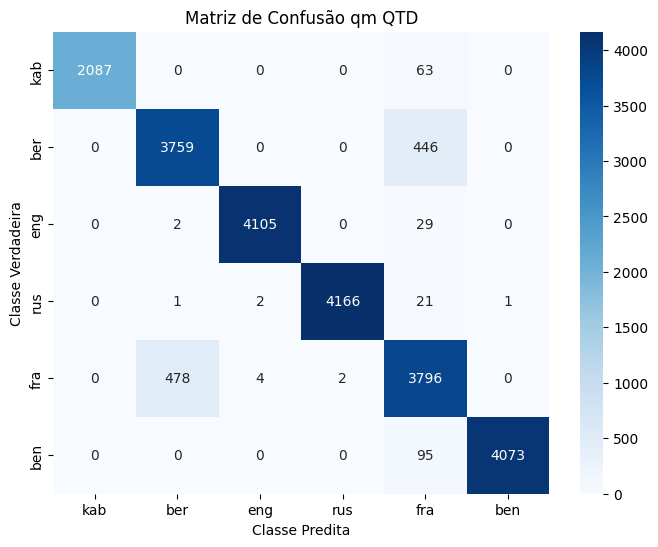

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)

label_names=['kab','ber','eng','rus','fra','ben']

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão qm QTD")
plt.show()


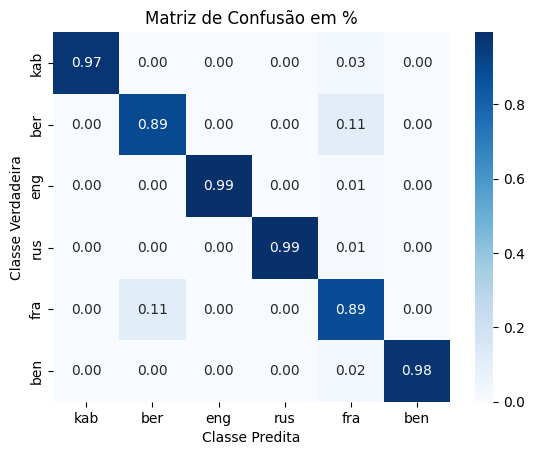

In [34]:
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Classe Predita")
plt.ylabel("Classe Verdadeira")
plt.title("Matriz de Confusão em %")
plt.show()


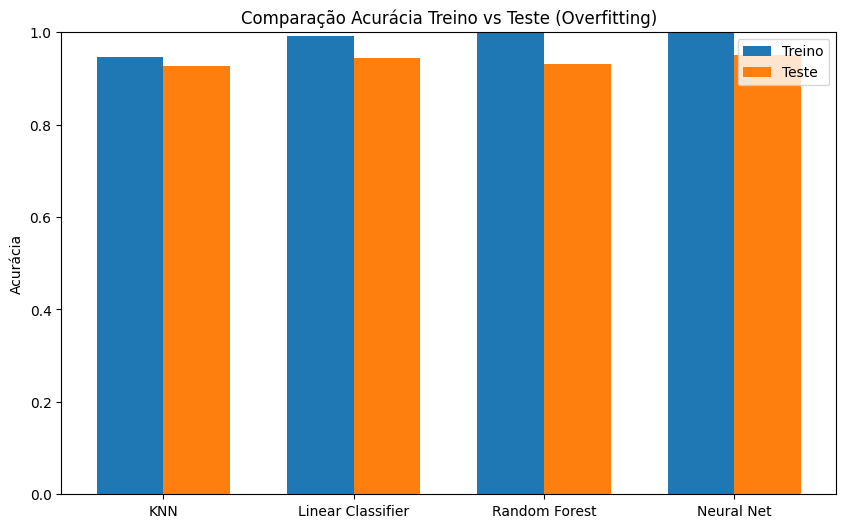

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = [r['classifier'] for r in result]
train_acc = [r['train_acc'] for r in result]
test_acc = [r['test_acc'] for r in result]

x = np.arange(len(classifiers))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, train_acc, width, label='Treino')
plt.bar(x + width/2, test_acc, width, label='Teste')

plt.xticks(x, classifiers)
plt.ylim(0,1)
plt.ylabel('Acurácia')
plt.title('Comparação Acurácia Treino vs Teste (Overfitting)')
plt.legend()
plt.show()


## Resultados: MUITO BONS!

Os resultados obtidos nessa primeira parte do trabalho foram ótimos! Com todos os classificadores tendo uma acurácia acima de 90%!

Para treinar todos os modelos demorou cerca de 40 minutos (Mesmo com a diminuição da quantidade de registros de meio milhão para 77 mil).

Penso eu o que aconteceria se eu deixasse as classes desbalanceadas. Ele iria prever a maioria como determinado idioma ou iria conseguir distinguir dado que os caracteres são diferentes? 



# Parte 2
Utilizando Word Embeddings pré treinados com uma rede baseada em LSTM e embeddings extraídos usando BERT.

In [1]:
# Carregando a base de dados novamente
import pandas as pd
dataframe = pd.read_csv("datasets/sentences_CC0.csv", sep="\t", header=None, names=["id", "lang", "text", "created_at"])

### Decisões: Reescolher novamente os idiomas

Não consegui encontrar um embedding pré treinado para os idiomas Kabyle, Berber e Bengali.

Os mesmos foram removidos e inserido o Finladês, mesmo que tenha poucos registros se comparados com os demais.

Visualizei os dados dos idiomas Espanhol, Italino e Português, porém, eram amostras insuficientes (menor que 100).

- Tentei buscar por idiomas oriundos do latim. Não encontrei o Romeno no dataset.

In [3]:
idiomas = ["eng", "rus", "fra", "fin", "ita", "por", "spa"]
dataframe = dataframe[dataframe["lang"].isin(idiomas)]

# Contagem absoluta
print(dataframe['lang'].value_counts())

# Contagem percentual
print((dataframe['lang'].value_counts(normalize=True) * 100).round(2))

dataframe.head(20)

lang
eng    41469
rus    21991
fra    14136
fin     1543
spa       37
ita       19
por       17
Name: count, dtype: int64
lang
eng    52.35
rus    27.76
fra    17.85
fin     1.95
spa     0.05
ita     0.02
por     0.02
Name: proportion, dtype: float64


,id,lang,text,created_at
0,330998,eng,Children who spend more time outdoors have a l...,2019-01-12 19:39:42
1,331000,eng,The idea that reading makes you short-sighted ...,2019-01-12 19:39:42
2,331259,eng,Most people think computers will never be able...,2019-01-12 19:39:42
3,331708,fra,Je rajoute une phrase d'exemple.,2019-01-12 19:39:42
4,331955,fra,J'espère que je ne serai plus malade la semain...,2019-01-12 19:39:42
5,332331,eng,It is more time-efficient to do several tasks ...,2019-01-12 19:39:42
6,333358,fra,"Alain me dit que ça ne marche pas, donc je tes...",2019-01-12 19:39:42
7,333372,fra,Je fais un autre test.,2019-01-12 19:39:42
8,333440,fra,L'homme que tu as vu hier est mon oncle.,2019-01-12 19:39:42
9,333441,fra,C'est l'homme dont les enfants sont si gentils.,2019-01-12 19:39:42


### Realizando o undersampling

In [4]:
# Alterado. Antes era 14 mil. 
n_amostras = 10000
amostras = []

# Capturando todos os registros do finlandes
amostras_idioma = dataframe[dataframe["lang"] == "fin"]
amostras.append(amostras_idioma.sample(n=1543, random_state=42))

# Antes tinhamos 6 idiomas, agora somente 4.
idiomas = ["eng", "rus", "fra"]

for lang in idiomas:
  amostras_idioma = dataframe[dataframe["lang"] == lang]
  amostras.append(amostras_idioma.sample(n=n_amostras, random_state=42))

dataframe = pd.concat(amostras)
dataframe = dataframe.sample(frac=1, random_state=42).reset_index(drop=True)

In [5]:
print(f"{dataframe.shape}\n--")
print(f"{dataframe['lang'].value_counts()}\n--")
lang_freq = dataframe["lang"].value_counts(normalize=True) * 100

print(lang_freq)

(31543, 4)
--
lang
fra    10000
eng    10000
rus    10000
fin     1543
Name: count, dtype: int64
--
lang
fra    31.702755
eng    31.702755
rus    31.702755
fin     4.891735
Name: proportion, dtype: float64


In [5]:
dataframe.head(20)

,id,lang,text,created_at
0,7115697,fin,En ole ikinä hoksannut mikä kauhutarinoissa ih...,2019-04-04 11:49:14
1,12750610,fra,"La Kabylie est riche en paysages variés, des m...",2024-09-29 19:13:18
2,12315062,eng,"In the Midwestern U.S. state of Michigan, the ...",2024-02-13 15:32:34
3,12045161,fra,Il n'y a aucune possibilité de cohabitation av...,2023-09-09 17:11:23
4,12776882,eng,Do they interpret the results correctly?,2024-10-10 22:41:37
5,12751913,fra,Les explorateurs polaires doivent comprendre l...,2024-09-30 07:46:09
6,10517343,fra,La série que nous regardons est passionnante.,2021-11-19 10:15:06
7,9843711,rus,Я люблю жучков. Они миленькие.,2021-05-22 13:09:23
8,9130532,rus,Вы превысили свои должностные полномочия и за ...,2021-05-22 13:06:19
9,11082614,rus,Я всегда старался использовать только проверен...,2022-08-27 10:21:17


### Pré-Processamento
Lembrando que: 

Não será aplicado a remoção de stop words, como "le/la" no francês, ou "the", "and" e "is" no inglês.

E nem a lematização: "correr", "correu", "correndo" -> "correr".

Pois o objetivo é classíficar os idiomas!

In [8]:
dataframe["words"] = dataframe["text"].apply(preprocessing)

### Apenas lembrando o tamanho das frases

In [9]:
# Caracteres
comprimentos = dataframe["text"].str.len() 
print("Mínimo:", comprimentos.min())
print("Médio:", comprimentos.mean())
print("Máximo:", comprimentos.max())

Mínimo: 3
Médio: 66.01962400532607
Máximo: 1019


In [10]:
# Palavras
comprimentos = dataframe["text"].str.split().str.len()
print("Mínimo:", comprimentos.min())
print("Médio:", comprimentos.mean())
print("Máximo:", comprimentos.max())

Mínimo: 1
Médio: 10.686935294677108
Máximo: 197


### Pré-processamento para o word embedding

Vamos utilizar os embedding do fasttext.

Disponíveis em: https://fasttext.cc/docs/en/crawl-vectors.html


: 

### Separando treino e teste